# UTS MODEL DEPLOYMENT : Hotel Dataset

### NAMA : AARON WINSTON GHO
### NIM : 2702210522

### Dataset information
Dataset 1B yang diberikan merupakan dataset tentang booking tempat penginapan di sebuah hotel. Dimana dataset ini terdiri dari 19 column dengan booking status sebagai y nya.

### Dataset goals
Tujuan utamanya adalah untuk memprediksi status dari pemesanan hotel dibatalkan atau tidak.

### Column information
- Booking_ID = Pengenal unik dari tiap pemesanan
- no_of_adults = Jumlah orang dewasa
- no_of_children = Jumlah anak kecil
- no_of_weekend_nights = Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau
memesan untuk menginap di hotel
- no_of_week_nights = Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau
memesan untuk menginap di hotel
- type_of_meal_plan = Jenis paket makanan yang dipesan oleh pelanggan
- required_car_parking_space = Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1-
Ya)
- room_type_reserved = Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh
INN Hotels
- lead_time = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan
- arrival_year = Tahun tanggal kedatangan
- arrival_month = Bulan tanggal kedatangan
- arrival_date = Tanggal kedatangan
- market_segment_type = Penunjukan segmen pasar
- repeated_guest = Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan
juga menginap? (0 - Tidak, 1- Ya)
- no_of_previous_cancellations = Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan
sebelum pemesanan saat ini
- no_of_previous_bookings_not_canceled = Jumlah pemesanan sebelumnya yang tidak dibatalkan
oleh pelanggan sebelum pemesanan saat ini
- avg_price_per_room = Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam
euro)
- no_of_special_requests = Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya
lantai yang tinggi, pemandangan dari kamar, dan lain-lain.)
- booking_status (target variable) = Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak.

# Importing Library 

In [3]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Correlation test & visualization libraries
import matplotlib.pyplot as mp
import seaborn as sns


#sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#Machine learning libraries
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# EDA 

### 1. Read the Datasets and overall look

In [4]:
df = pd.read_csv("Dataset_B_hotel.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

dari df.info kita melihat kalau ada Booking_ID dimana ini merupakan variable identifier sehingga bisa kita remove karena dia di gunakan sebagai key bukan untuk prediction

In [6]:
df.drop(["Booking_ID"], axis="columns", inplace=True)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [7]:
df['repeated_guest'] = df['repeated_guest'].astype('object')
df['required_car_parking_space'] = df['required_car_parking_space'].astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     35368 non-null  object 
 5   required_car_parking_space            35005 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

disini kita mengubah required car parking dan repeated guest untuk lebih memudahkan dalam visualisasi nantinya karena mereka adalah binary datatype yang sudah di encoding

### 2. check the duplicates

In [9]:
df.duplicated().sum()

9197

semua duplikat merupakan data yang berulang dan memiliki informasi yang sama untuk model kita nantinya dalam memprediksi kasus yang ada sehingga lebih baik untuk di drop dibandingkan untuk kita pertahanin.

In [10]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2,2,0,1,Meal Plan 1,0.0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


### 3. check missing values and removes it

In [11]:
df.replace(['NaN', 'nan', 'NULL', 'None', '?', ''], np.nan, inplace=True)
df.isna().sum()
percentage_na = df.isna().sum()/len(df)
print(percentage_na*100)

no_of_adults                            0.000000
no_of_children                          0.000000
no_of_weekend_nights                    0.000000
no_of_week_nights                       0.000000
type_of_meal_plan                       3.249871
required_car_parking_space              4.394712
room_type_reserved                      0.000000
lead_time                               0.000000
arrival_year                            0.000000
arrival_month                           0.000000
arrival_date                            0.000000
market_segment_type                     0.000000
repeated_guest                          0.000000
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
avg_price_per_room                      5.602334
no_of_special_requests                  0.000000
booking_status                          0.000000
dtype: float64


/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_60329/2741524245.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['NaN', 'nan', 'NULL', 'None', '?', ''], np.nan, inplace=True)
/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_60329/2741524245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['NaN', 'nan', 'NULL', 'None', '?', ''], np.nan, inplace=True)


karena nilai dari missing values 5% ke bawah maka akan kita drop saja

In [12]:
df = df.dropna()
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### 4. Unique Words for each categorical

In [14]:
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status','repeated_guest','required_car_parking_space']
print("Unique Values (Categorical/Binary Columns):")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

Unique Values (Categorical/Binary Columns):
type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type: ['Offline' 'Online' 'Corporate' 'Complementary' 'Aviation']
booking_status: ['Not_Canceled' 'Canceled']
repeated_guest: [0 1]
required_car_parking_space: [0. 1.]


disini tidak ada typo untuk penulisan di categorical so kita akan langsung lanjut ke visualization

### 5. Visualization for numerical and categorical column

In [15]:
num_cols = []
cat_cols = []

for column in df.columns:
    if column in categorical_columns:
        cat_cols.append(column)
    else:
        if pd.api.types.is_numeric_dtype(df[column]):
            num_cols.append(column)

df[cat_cols] = df[cat_cols].astype('category')

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical columns: ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']


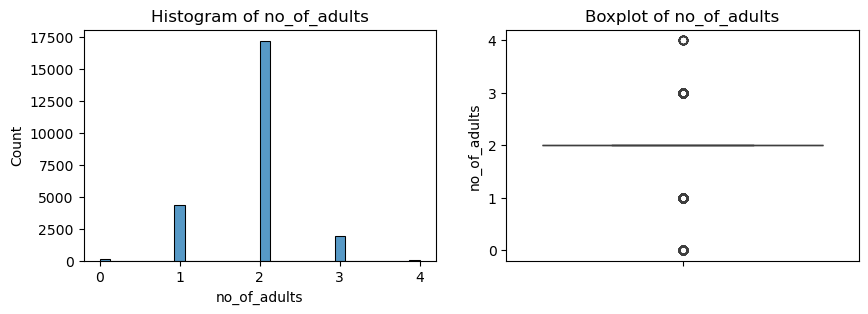

Skewness of no_of_adults: -0.2999152356946826
Kurtosis of no_of_adults: 1.1100516095174395


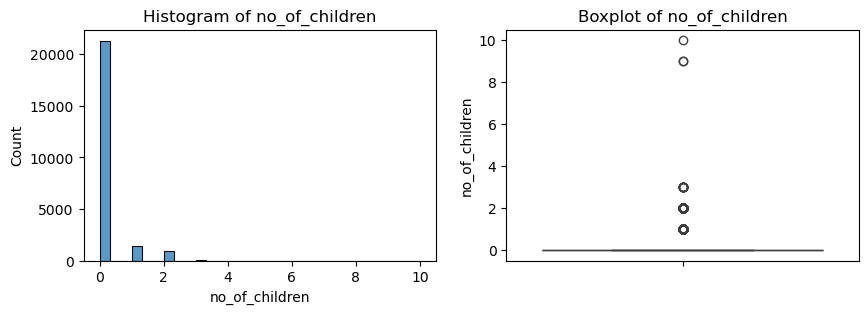

Skewness of no_of_children: 4.104433818603448
Kurtosis of no_of_children: 29.557213582659053


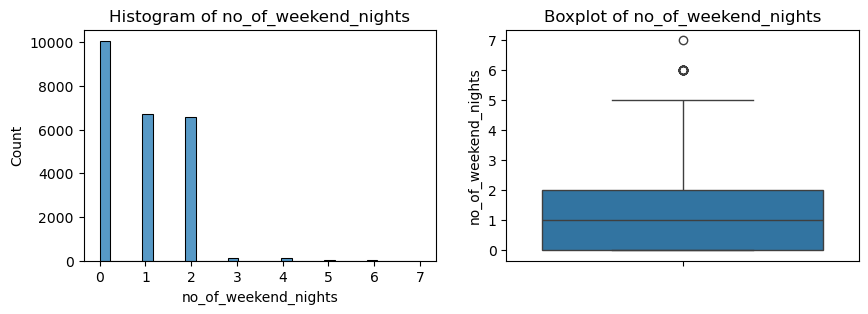

Skewness of no_of_weekend_nights: 0.6632423864629869
Kurtosis of no_of_weekend_nights: 0.37626614091695565


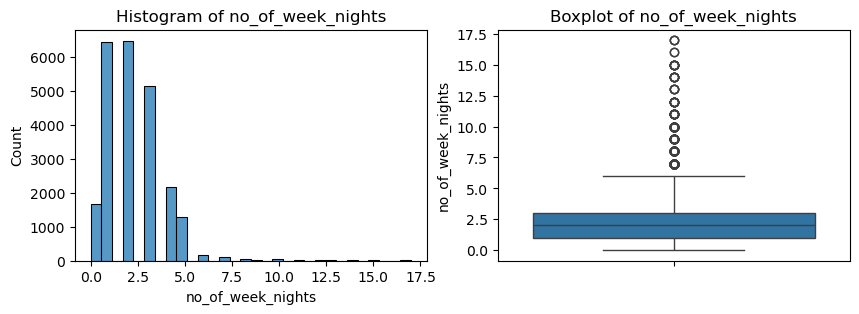

Skewness of no_of_week_nights: 1.6264419947726958
Kurtosis of no_of_week_nights: 7.404382587639077


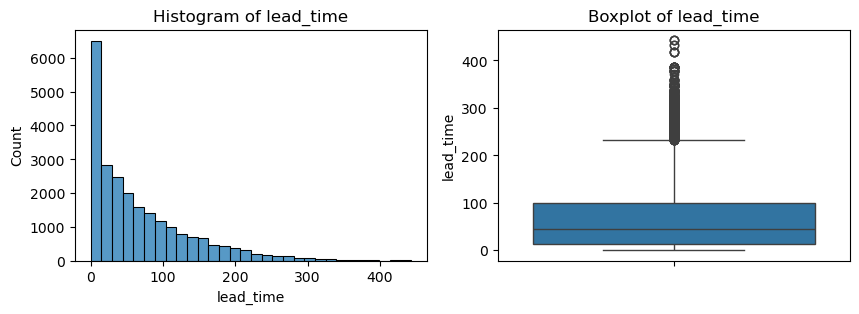

Skewness of lead_time: 1.4057189675092234
Kurtosis of lead_time: 1.8678431724695441


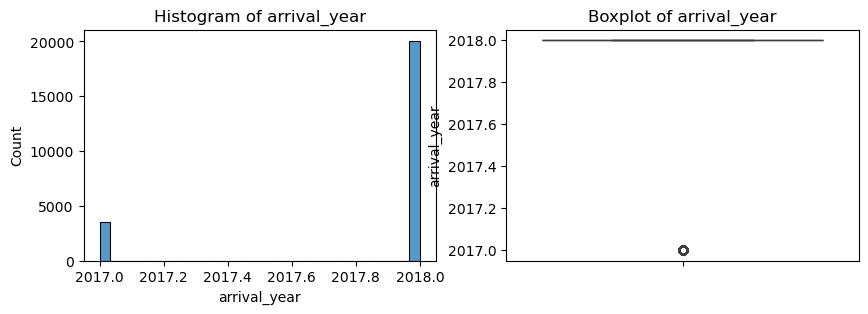

Skewness of arrival_year: -1.956108239287647
Kurtosis of arrival_year: 1.8265140294543123


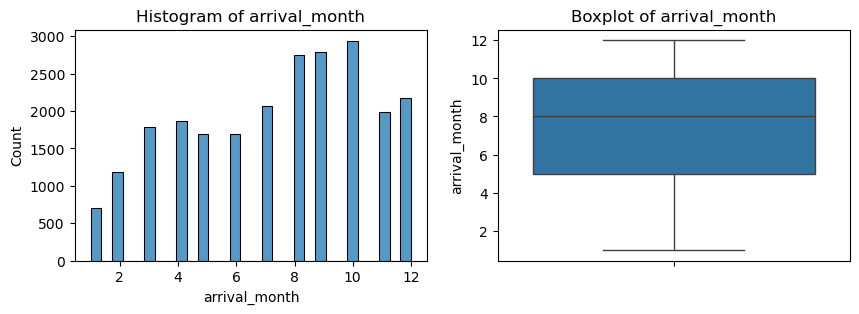

Skewness of arrival_month: -0.29363995953902794
Kurtosis of arrival_month: -1.0021960062350965


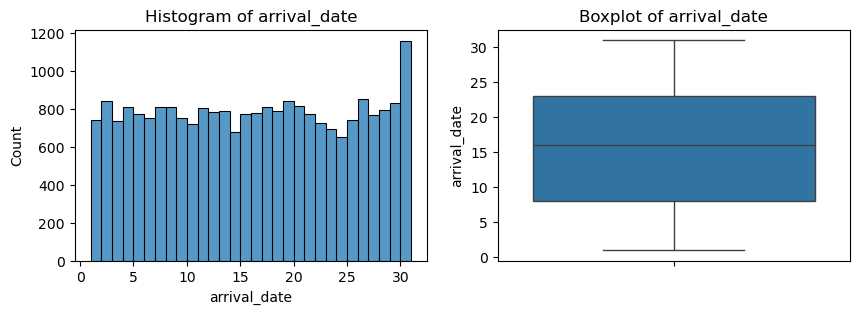

Skewness of arrival_date: 0.012584958616689148
Kurtosis of arrival_date: -1.2003932708939595


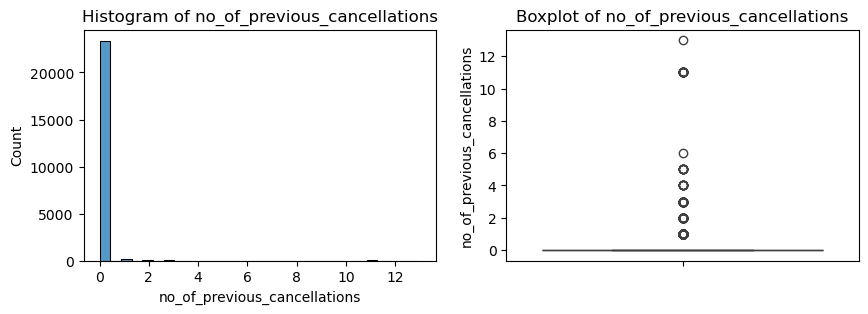

Skewness of no_of_previous_cancellations: 22.182508824685847
Kurtosis of no_of_previous_cancellations: 560.2865765722249


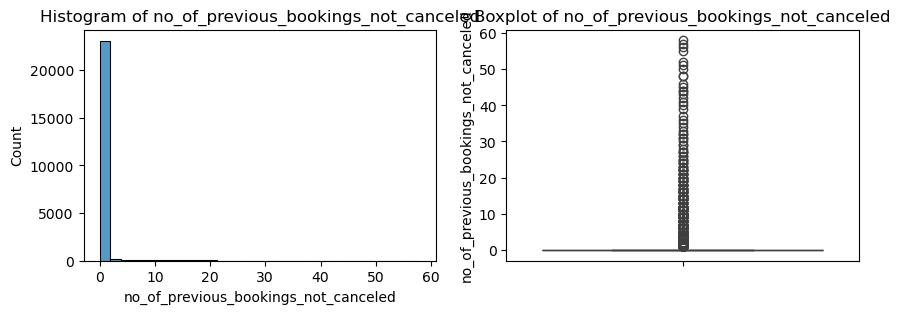

Skewness of no_of_previous_bookings_not_canceled: 16.428652159046262
Kurtosis of no_of_previous_bookings_not_canceled: 336.0877298492529


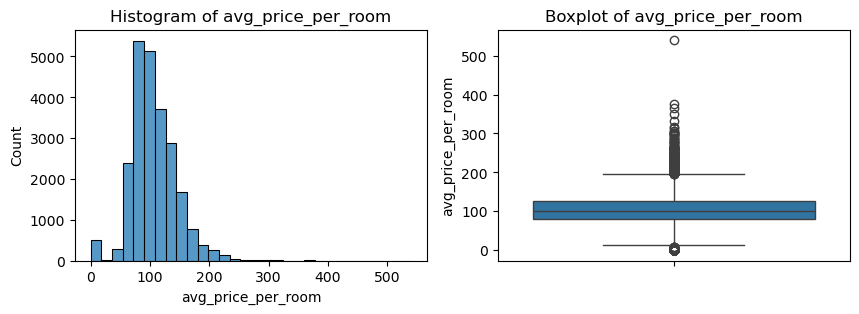

Skewness of avg_price_per_room: 0.5857365565249829
Kurtosis of avg_price_per_room: 2.693485090930711


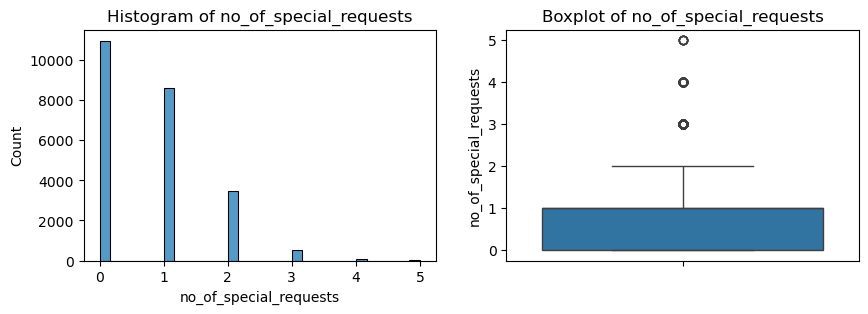

Skewness of no_of_special_requests: 0.9176104140055928
Kurtosis of no_of_special_requests: 0.4304874312393583


In [ ]:
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f'Skewness of {col}:', df[col].skew())
        print(f'Kurtosis of {col}:', df[col].kurt())

check_distribution_outliers(df, num_cols)

oke mari kita lihat anomali per kolomnya:
1. no of adults, disini tidak ada anomali dan masih terlihat normal 
2. no of children, untuk no of children juga terlihat normal secara distribusinya tidak ada angka yang ga mungkin
3. no of weekends night disini butuh di perbaiki dimana seharusnya maksimal dari weekends night itu 2 yaitu malam sabtu dan malam minggu. ( anomali detected )
4. no of week night dimana maksimal untuk satu minggu adalah 5 dan ada data yang koma ( nantinya ini akan kita up atau rounding ke atas karena tidak memungkinkan untuk menginap setengah hari umumnya dalam hotel ). ini di round up karena mengingat hari dipakai untuk menginap jadi kita akan itung termasuk 1 hari. ( anomali detected )
5. lead time, secara distribusi data aman dan tidak ada data yang tidak mungkin.
6. arrival year , nilai dari data yang ada aman namun data inbalance.
7. arrival month, nilai dari data aman namun masih ada 1/2 bulan yang inbalance distribusinya.
8. arrival date, nilai dan distribusi data aman
9. previous cancellations, distribusi tidak aman namun datanya sama.
10. average price room, nilai dari data aman namun distribusinya memiliki banyak outliers namun hal ini akan kita biarkan karena nilai dari outliers masih wajar untuk diterima.
11. no of special requests, ini juga aman secara nilai namun distribusinya inbalance di 3,4 dan 5.

In [ ]:
df['no_of_weekend_nights'] = df['no_of_weekend_nights'].apply(lambda x: 2 if x > 2 else x)
df['no_of_week_nights'] = np.ceil(df['no_of_week_nights'])
df['no_of_week_nights'] = df['no_of_week_nights'].apply(lambda x: 5 if x > 5 else x)

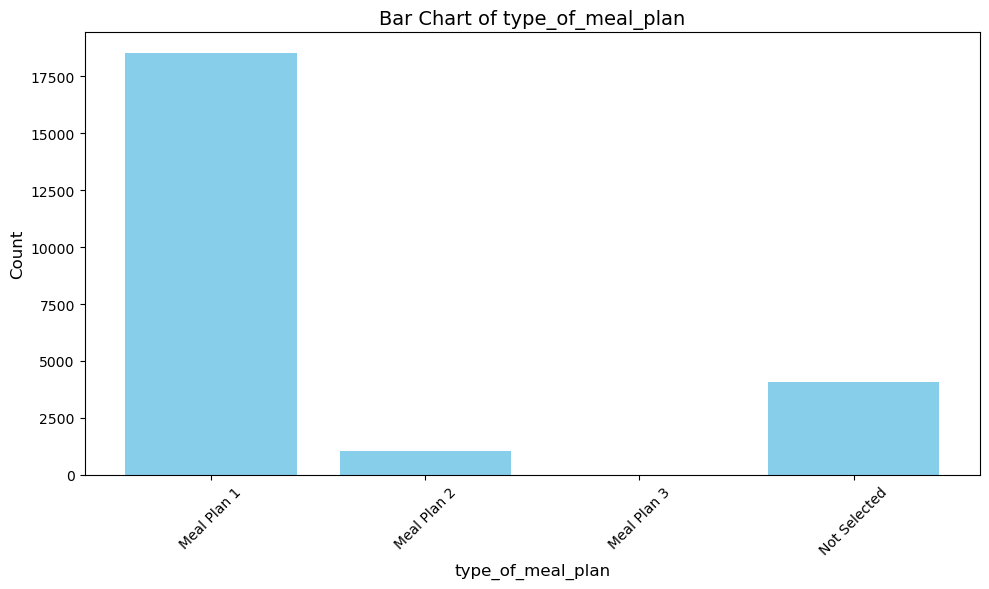

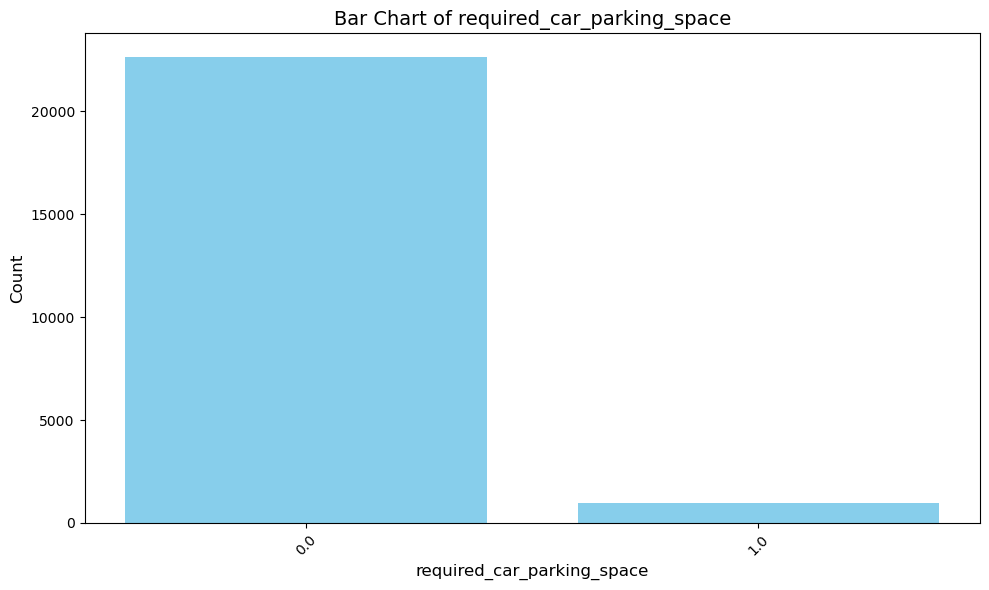

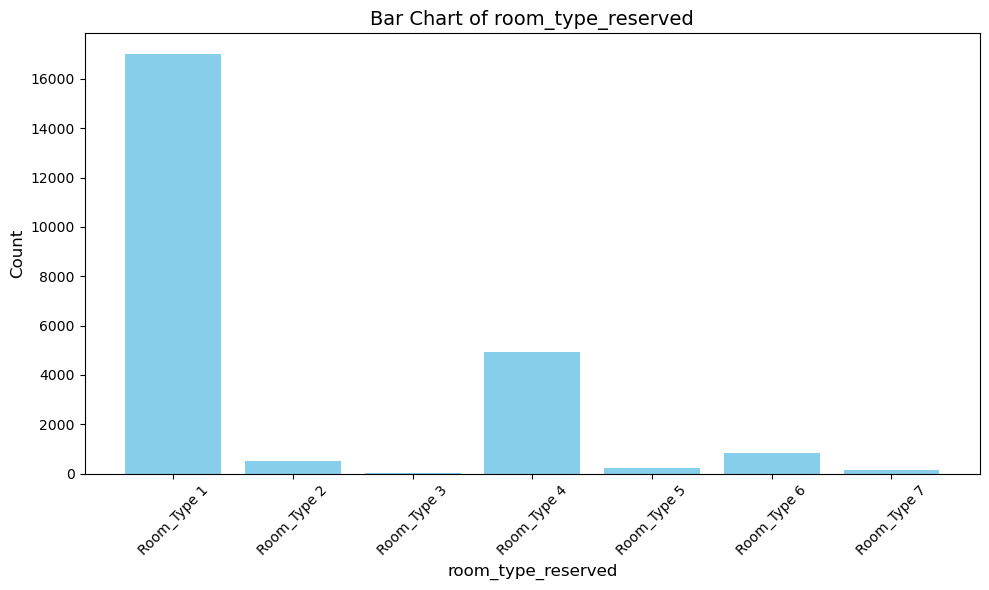

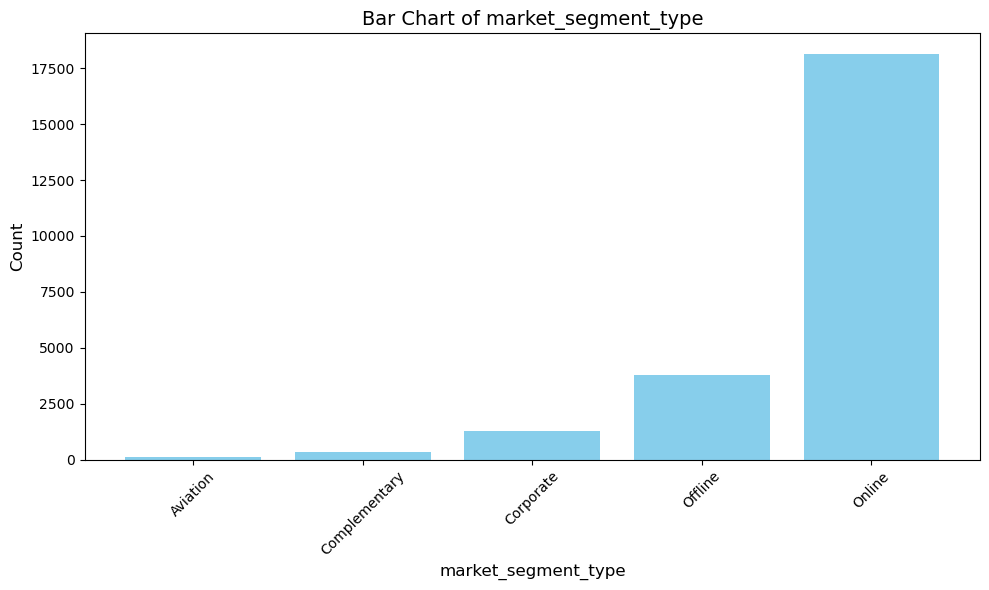

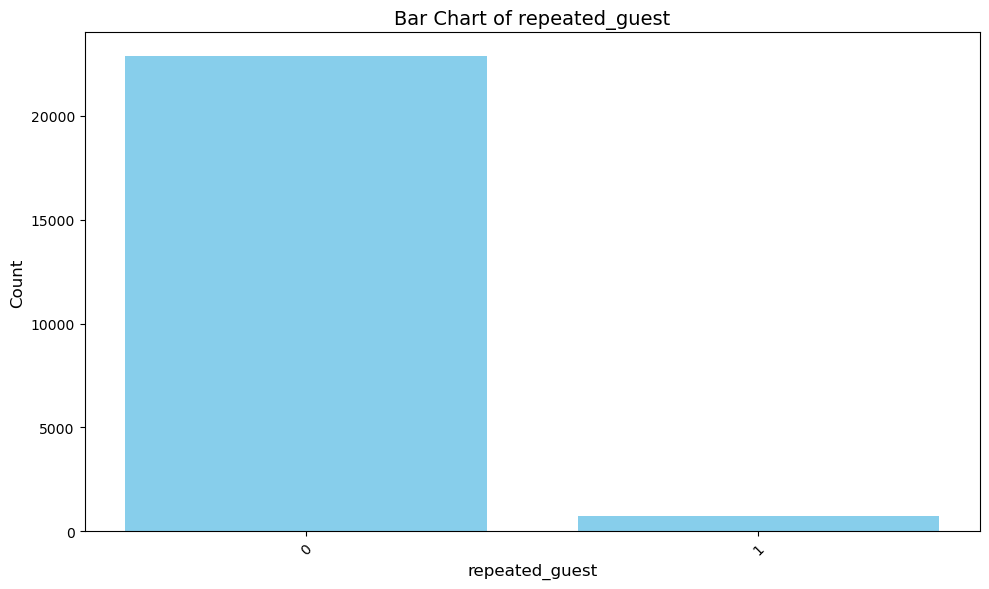

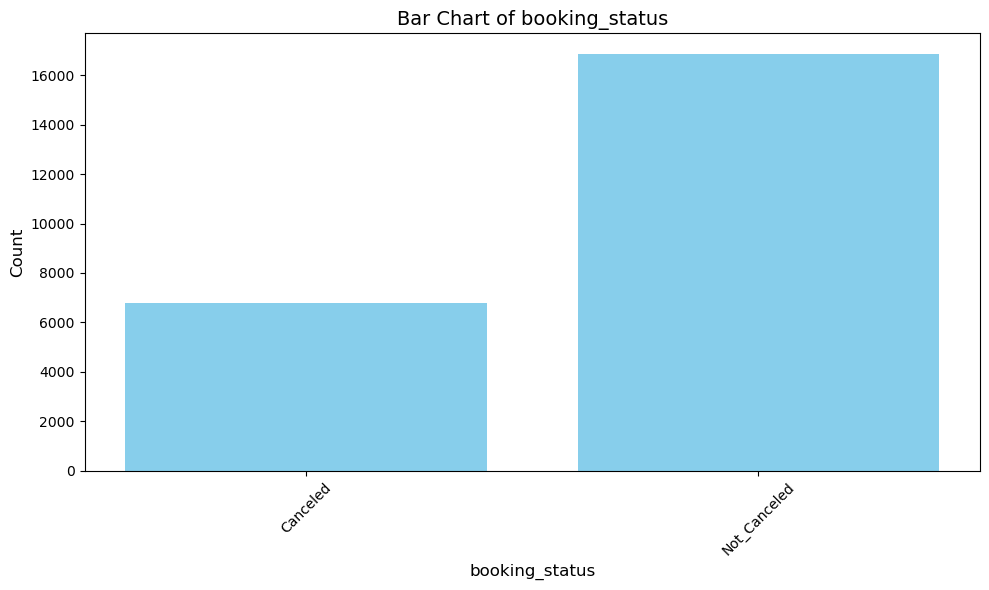

In [ ]:
def plot_categorical(data, columns):
    for column in columns:
        value_counts = data[column].value_counts().sort_index().reset_index()
        value_counts.columns = ['value', 'count']

        plt.figure(figsize=(10, 6))
        plt.bar(value_counts['value'].astype(str), value_counts['count'], color='skyblue')
        plt.title(f'Bar Chart of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_categorical(df,cat_cols)

untuk kolom categorical sendiri kita akan mencari anomalinya:
1. meal plan, untuk meal plan memiliki distribusinya yang inbalance pada 2 , 3 dan 4
2. car parking space, aman ya dari nilai datanya cuman inbalance aja datanya.
3. room og type , untuk ini secara nilai aman tapi inabalance juga datanya
4. market segment type, sama juga datanya inbalance berfokus pada online
5. repeated quest, nilai dari data aman namun sekali lagi distribusinya inbalance.
6. booking status untuk distribusinya juga cukup inbalance lebih merojok ke not cancelled.

kesimpulan EDA:
dengan data numeric dan categorical yang inbalance ini nantinya bisa menyebabkan bias pada target variable yaitu y dimana ini terbukti dari ditribusi y yang cukup inbalance

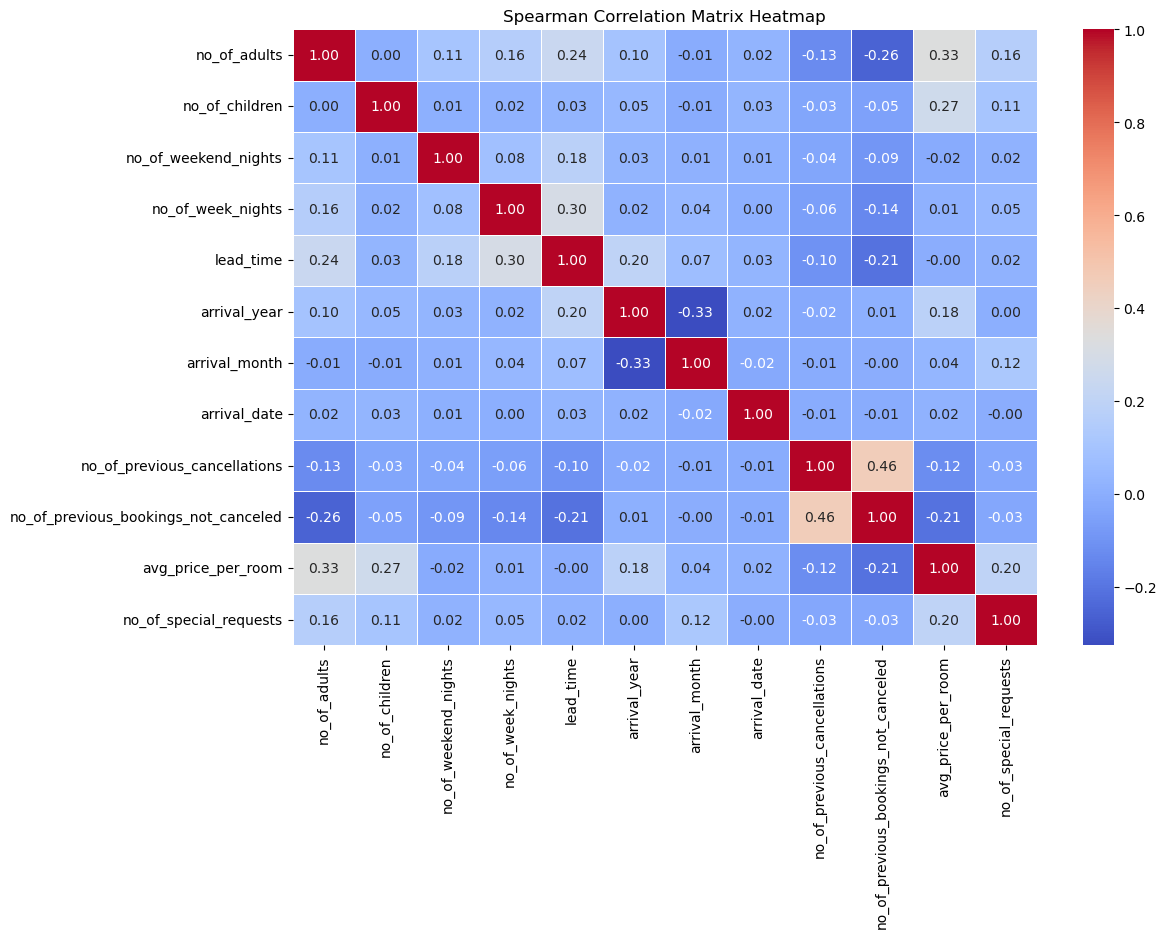

In [20]:
spearman_corr = df[num_cols].corr(method='spearman')
mp.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
mp.title('Spearman Correlation Matrix Heatmap')
mp.show()

# Preprocessing

### 1. splitting the dataset

In [ ]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2,2,0,1,Meal Plan 1,0.0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


In [ ]:
x = df[df.columns.drop(['booking_status'])]
y = df['booking_status']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
x_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
17292,1,0,0,3,Meal Plan 1,0.0,Room_Type 1,37,2018,3,24,Online,0,0,0,112.20,0
16683,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,107,2018,11,25,Offline,0,0,0,68.00,0
20395,2,0,0,1,Meal Plan 1,0.0,Room_Type 1,50,2018,6,22,Online,0,0,0,76.92,1
7699,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,118,2018,6,6,Offline,0,0,0,120.00,0
20842,2,0,0,1,Not Selected,0.0,Room_Type 1,0,2018,9,29,Online,0,0,0,170.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15008,2,1,1,0,Meal Plan 1,0.0,Room_Type 1,2,2018,9,11,Online,0,0,0,175.00,1
27138,2,0,1,4,Not Selected,0.0,Room_Type 1,79,2018,3,28,Online,0,0,0,72.25,0
10981,2,0,0,4,Not Selected,0.0,Room_Type 1,4,2018,6,29,Online,0,0,0,127.00,2
12113,3,0,1,2,Meal Plan 1,0.0,Room_Type 4,60,2018,11,18,Online,0,0,0,126.00,1


### 2. Scaling the num columns

disini kita pakai robust karena banyak sekali outlier di data kita sehingga aman nantinya untuk model prediksi

In [ ]:
scaler_x = RobustScaler()
x_train[num_cols] = scaler_x.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler_x.transform(x_test[num_cols])

In [ ]:
x_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
442,0.0,0.0,0.0,0.5,Meal Plan 1,0.0,Room_Type 1,-0.079545,0.0,-1.0,-0.400000,Online,0,0.0,0.0,-0.391351,1.0
17680,-1.0,0.0,-0.5,-0.5,Meal Plan 1,0.0,Room_Type 1,-0.340909,0.0,0.2,-0.133333,Corporate,1,0.0,4.0,-0.237838,0.0
24775,1.0,0.0,-0.5,0.0,Meal Plan 1,0.0,Room_Type 4,0.772727,0.0,-0.2,-0.200000,Online,0,0.0,0.0,0.815135,1.0
6989,0.0,0.0,-0.5,0.5,Meal Plan 1,0.0,Room_Type 1,-0.306818,-1.0,0.4,-1.000000,Online,0,0.0,0.0,0.288216,1.0
3165,-1.0,0.0,-0.5,0.0,Meal Plan 1,0.0,Room_Type 1,0.034091,-1.0,0.0,0.133333,Offline,0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17001,-1.0,0.0,-0.5,0.5,Meal Plan 1,0.0,Room_Type 5,-0.454545,0.0,-0.2,0.200000,Corporate,0,0.0,0.0,1.016216,-1.0
32822,0.0,0.0,-0.5,0.5,Not Selected,0.0,Room_Type 1,-0.420455,0.0,0.2,-0.600000,Online,0,0.0,0.0,1.059459,1.0
7247,1.0,0.0,0.0,-1.0,Meal Plan 2,0.0,Room_Type 4,-0.261364,0.0,-0.6,-0.066667,Online,0,0.0,0.0,2.391351,-1.0
1010,1.0,0.0,0.5,-0.5,Meal Plan 1,0.0,Room_Type 4,-0.465909,0.0,-0.4,-0.266667,Online,0,0.0,0.0,1.088216,-1.0


### 3. Encoding each categorical features

In [ ]:
cat_cols.remove('booking_status')
print(cat_cols)

['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest']


In [ ]:
label_cols = ['repeated_guest','required_car_parking_space']
label_encoder = LabelEncoder()
nom_cols = [i for i in cat_cols if i not in label_cols]
ohe_encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
print(label_cols,nom_cols)

['repeated_guest', 'required_car_parking_space'] ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


untuk type of meal , room type reserved dan market segment type kita akan menggunakan one hot encoder karena tidak ada urutan yang pasti untuk ketiga kolom ini

In [ ]:
new_nom_cols = ohe_encoder.fit_transform(x_train[nom_cols])
encoded_data = pd.DataFrame(new_nom_cols, columns=ohe_encoder.get_feature_names_out(nom_cols))
x_train = x_train.reset_index(drop=True)
x_train = pd.concat([x_train.drop(nom_cols,axis=1,errors='ignore'),encoded_data],axis=1)

new_nom_cols = ohe_encoder.transform(x_test[nom_cols])
encoded_data = pd.DataFrame(new_nom_cols, columns=ohe_encoder.get_feature_names_out(nom_cols))
x_test = x_test.reset_index(drop=True)
x_test = pd.concat([x_test.drop(nom_cols,axis=1,errors='ignore'),encoded_data],axis=1)

okay for the x train for repeated guest and required car parking space kita akan menggunakan label encoding hal ini dikarenakan unique value dari column ini hanya ada 2 jadi cocok untuk menggunakan label encoder.

In [ ]:
for col in label_cols:
    x_train[col] = label_encoder.fit_transform(x_train[col])
    x_test[col] = label_encoder.transform(x_test[col])

untuk y_train dan y_test karena booking status juga hanya memiliki 2 unique value makanya kita akan menggunakan label encoder

In [ ]:
y_train = pd.DataFrame(y_train, columns=['booking_status'])
y_test= pd.DataFrame(y_test, columns=['booking_status'])
y_train['booking_status'] = label_encoder.fit_transform(y_train['booking_status'])
y_test['booking_status'] = label_encoder.transform(y_test['booking_status'])
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
x_train = x_train.reset_index(drop=True)


# Training Model

In [ ]:
RF_class = RandomForestClassifier(criterion= 'gini',random_state=42)
RF_class.fit(x_train, y_train)
rf_predictions = RF_class.predict(x_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.8523063901819721
Confusion Matrix:
[[ 907  436]
 [ 262 3121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1343
           1       0.88      0.92      0.90      3383

    accuracy                           0.85      4726
   macro avg       0.83      0.80      0.81      4726
weighted avg       0.85      0.85      0.85      4726



In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(x_train, y_train)

xg_pred = xgb_model.predict(x_test)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:56:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
xg_accuracy_before = accuracy_score(y_test, xg_pred)
print(f"XGBOOST Accuracy: {xg_accuracy_before}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, xg_pred))

print("Classification Report:")
print(classification_report(y_test, xg_pred))

XGBOOST Accuracy: 0.8556919170545916
Confusion Matrix:
[[ 936  407]
 [ 275 3108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1343
           1       0.88      0.92      0.90      3383

    accuracy                           0.86      4726
   macro avg       0.83      0.81      0.82      4726
weighted avg       0.85      0.86      0.85      4726



berdasarkan training disini kita dapat melihat kalau accuary terbesar ada pada XGboost sehingga nantinya kita akan melakukan hyperparameter tuning pada model xgboost. Selain itu yang menjadi target utama kita ada di macro avg recall dikarenakan dalam status book cancel sangat penting untuk kita lebih memastikan booking seseorang itu yes dibandingin no karena bisa gawat kalau di sebuah hotel seseorang udh booking tapi di prediksi nya cancel. Berbeda dengan kasus kalau seseorang tidak booking dikatakan iya, maka nantinya ruangan itu masih bisa dialihkan ke pengunjung lain jadi target utama kita membesarkan macro avg recallnya.

In [ ]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 6, 8, 10],
    'n_estimators': [100, 200, 300, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, 
                                       n_iter=100, cv=3, scoring='recall_macro', n_jobs=-1, verbose=1, random_state=42)

xgb_random_search.fit(x_train, y_train)

print("Best XGBoost Parameters (Based on Macro Recall):", xgb_random_search.best_params_)

xgb_best_model = xgb_random_search.best_estimator_

xgb_predictions = xgb_best_model.predict(x_test)
xg_accuracy_after = accuracy_score(y_test, xgb_predictions)
print(f"XGBOOST Accuracy: {xg_accuracy_after}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:56:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:56:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:56:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:56:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best XGBoost Parameters (Based on Macro Recall): {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
XGBOOST Accuracy: 0.8624629707998307
Confusion Matrix:
[[ 951  392]
 [ 258 3125]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1343
           1       0.89      0.92      0.91      3383

    accuracy                           0.86      4726
   macro avg       0.84      0.82      0.83      4726
weighted avg       0.86      0.86      0.86      4726



In [ ]:
print("before tuning:")
print(f"XGBOOST Accuracy: {xg_accuracy_before}")
print("Classification Report:")
print(classification_report(y_test, xg_pred))
print("--------------------------------")
print("after tuning:")
print(f"XGBOOST Accuracy: {xg_accuracy_after}")
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))

before tuning:
XGBOOST Accuracy: 0.8556919170545916
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1343
           1       0.88      0.92      0.90      3383

    accuracy                           0.86      4726
   macro avg       0.83      0.81      0.82      4726
weighted avg       0.85      0.86      0.85      4726

--------------------------------
after tuning:
XGBOOST Accuracy: 0.8624629707998307
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1343
           1       0.89      0.92      0.91      3383

    accuracy                           0.86      4726
   macro avg       0.84      0.82      0.83      4726
weighted avg       0.86      0.86      0.86      4726



after we tuning it, the accuary increases from 0.855 to 0.862, it's a small increase (0.01) tapi setidaknya ada improvment dari tuning kita. nah model setelah di tuning inilah yang akan kita ambil dan transfer ke pickle.

# Saving to Pickle

In [ ]:
import pickle

with open('trained_model.pkl', 'wb') as f:
    pickle.dump(xgb_best_model, f)
